In [1]:
import tensorflow as tf

a = tf.placeholder("float")
b = tf.placeholder("float")

y = tf.multiply(a, b)

sess = tf.Session()

print (sess.run(y, feed_dict={a: 3, b: 3}))

/home/spawnqq/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


9.0


In [2]:
import numpy as np

num_puntos = 1000
conjunto_puntos = []
for i in range(num_puntos):
    x1= np.random.normal(0.0, 0.55)
    y1= x1 * 0.1 + 0.3 + np.random.normal(0.0, 0.03)
    conjunto_puntos.append([x1, y1])

x_data = [v[0] for v in conjunto_puntos]
y_data = [v[1] for v in conjunto_puntos]

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize = (8, 6), dpi = 80)

plt.scatter(x_data, y_data, color='r')
plt.legend()
plt.show()

No handles with labels found to put in legend.


<Figure size 640x480 with 1 Axes>

# Función de coste y algoritmo gradient descent  

El siguiente paso consiste en entrenar nuestro algoritmo de aprendizaje para que sea capaz de precedir los valores de salida y, estimados a partir de la entrada x_data. En este caso, como sabemos de antemano que se trata de una regresión lineal, podemos representar nuestro modelo con solo dos parámetros W y b.  

Se trata de generar un código en TensorFlow que permita encontrar los mejores parámetros W y b, que a partir de los datos de entrada x_data, ajuste de la mejor manera a los datos de salida y_data, en nuestro caso en forma de una recta definida por y_data = W * x_data + b . El lector sabe que el valor W debe ser próximo al 0.1 y b próximo a 0.3, pero TensorFlow no lo sabe y debe darse cuenta de ello por si solo.

Una forma estándar de solucionar este tipo de problemas es iterar a través de cada valor del conjunto de datos e ir modificando los parámetros W y b, para obtener una respuesta cada vez más acertada. Para saber si vamos mejorando en estas iteraciones, definiremos una función de coste (también llamada función de error) que mida como de “buena” (en realidad como de “mala”) es una determinada recta. Esta función recibe como parámetros el par W y b, y devuelve un valor de error basado en cómo de bien la recta ajusta a los datos. En nuestro ejemplo podemos usar como función de coste la que se conoce como mean squared error.

Con el mean squared error obtenemos la media de los “errores” en base a la distancia entre el valor real y el valor estimado de cada una de la iteraciones. Más adelante entraremos en detalle con la función de coste y sus alternativas, pero para este ejemplo introductorio nos sirve para ir avanzando paso a paso.



In [4]:
W = tf.Variable(tf.random_uniform([1], -1.0, 1.0))
b = tf.Variable(tf.zeros([1]))
y = W * x_data + b

In [5]:
loss = tf.reduce_mean(tf.square(y - y_data))
loss

<tf.Tensor 'Mean:0' shape=() dtype=float32>

In [6]:
optimizer = tf.train.GradientDescentOptimizer(0.5)
train = optimizer.minimize(loss)

In [7]:
init = tf.initialize_all_variables()

sess = tf.Session()
sess.run(init)

Instructions for updating:
Use `tf.global_variables_initializer` instead.


In [8]:
for step in range(15):
    sess.run(train)
print (step, sess.run(W), sess.run(b))


14 [0.10392476] [0.3003153]


No handles with labels found to put in legend.


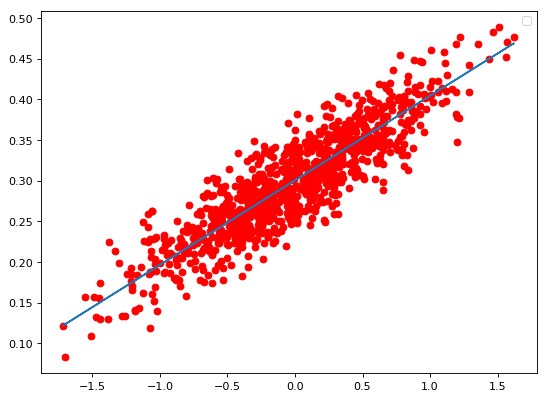

In [9]:
plt.figure(figsize = (8, 6), dpi = 80)

plt.plot(x_data, y_data, 'ro')
plt.plot(x_data, sess.run(W) * x_data + sess.run(b))
plt.legend()
plt.show()

# Algoritmo K-means

A partir de un conjunto de datos random en una superficie 2D, se determina el cetroide de cada conjunto de datos y cada cluster se visualizara de un color especifico.



In [10]:
num_puntos = 2000
conjunto_puntos = []
for i in range(num_puntos):
   if np.random.random() > 0.5:
     conjunto_puntos.append([np.random.normal(0.0, 0.9), np.random.normal(0.0, 0.9)])
   else:
     conjunto_puntos.append([np.random.normal(3.0, 0.5), np.random.normal(1.0, 0.5)])

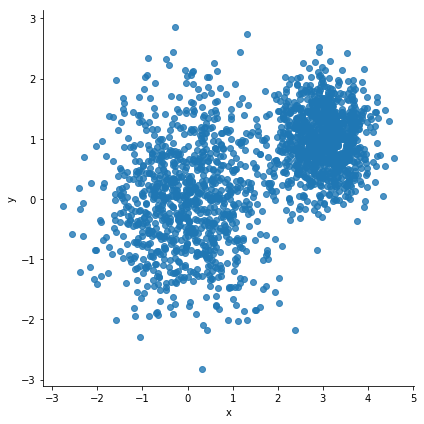

In [11]:
import pandas as pd
import seaborn as sns

df = pd.DataFrame({"x": [v[0] for v in conjunto_puntos],
        "y": [v[1] for v in conjunto_puntos]})
sns.lmplot("x", "y", data=df, fit_reg=False, size=6)
plt.show()